# 2024S AML 1114 1 [B230] Data Science and Machine Learning
## Final Project - Heart Disease EDA

**Group members:**
* Pallavi Sathyanarayana C0935830
* Uma Varadaraj C0935831
* Andrea Franco C0931897
* Andres Salguero C0932873


## Dataset description

The chosen dataset for this project is the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from the UCI repository.

As described in the website of the dataset, although there are 76 attributes in this database, only 14 of them are used in the published studies.  Specifically, the Cleveland database is the only one that ML researchers have utilized thus far.  The patient's heart disease status is indicated in the "goal" field.  Its values range from 0 (no presence) to 4 in integers. The Cleveland database has been used in experiments primarily to try and separate presence (values 1, 2, 3, 4) from absence (value 0).  

Below can be seen the features with a short description and the meaning of each encoded class:
   

* age: age in years
* sex: sex (1 = male; 0 = female)
* chest pain type:        

    * Value 1: typical angina        
    * Value 2: atypical angina       
    * Value 3: non-anginal pain     
    * Value 4: asymptomatic
    
* resting blood pressure (in mm Hg on admission to the hospital)
* serum cholestoral in mg/dl
* (fasting blood sugar > 120 mg/dl):  (1 = true; 0 = false)
* resting electrocardiographic results:
    * Value 0: normal 
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* maximum heart rate achieved
* exercise angina: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment  

    * Value 1: upsloping     
    * Value 2: flat     
    * Value 3: downsloping
    
* **target:** diagnosis of heart disease (angiographic disease status)        
    * Value 0: < 50% diameter narrowing        
    * Value 1: > 50% diameter narrowing        (in any major vessel: attributes 59 through 68 are vessels)



The UCI repository bring us some attributes with the dataset which allow us to see the metadata of it and information about the variables.


| name               | role    | type        | data_type | demographic | description                                            | units | missing_values |
|--------------------|---------|-------------|-----------|-------------|--------------------------------------------------------|-------|----------------|
| age                | Feature | Integer     | int64     | Age         | None                                                   | years | no             |
| sex                | Feature | Categorical | int64     | Sex         | None                                                   | None  | no             |
| chest pain type    | Feature | Categorical | int64     | None        | None                                                   | None  | no             |
| resting bp s       | Feature | Integer     | int64     | None        | resting blood pressure (on admission to the hospital)  | mm Hg | no             |
| cholesterol        | Feature | Integer     | int64     | None        | serum cholesterol                                      | mg/dl | no             |
| fasting blood sugar| Feature | Categorical | int64     | None        | fasting blood sugar > 120 mg/dl                        | None  | no             |
| resting ecg        | Feature | Categorical | int64     | None        | None                                                   | None  | no             |
| max heart rate     | Feature | Integer     | int64     | None        | maximum heart rate achieved                            | None  | no             |
| exercise angina    | Feature | Categorical | int64     | None        | exercise induced angina                                | None  | no             |
| oldpeak            | Feature | Integer     | float64   | None        | ST depression induced by exercise relative to rest     | None  | no             |
| ST slope           | Feature | Categorical | int64     | None        | None                                                   | None  | no             |
| target             | Target  | Integer     | int64     | None        | diagnosis of heart disease                             | None  | no             |



## Import libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load and overview of the dataset

This dataset has 1190 samples and 12 features

In [85]:
df = pd.read_csv("dataset_heart_disease.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [86]:
# check shape of the dataset
df.shape

(1190, 12)

In [87]:
# check the columns
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

## Check for null values

As we can see in the next two cells of code apparently, there are no null values in the dataset and all of its features are numerical features; most of them are integers and only one of them is float type:

In [88]:
# check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [89]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

## Check for unique values:

As we can see, the values of the number of encoded classes match with the above description provided by the repository

In [90]:
df.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

We can double check for the encoded values for each class of the categorical variables:

In [91]:
# extract categorical features
categorical_features = [ 'sex', 'chest pain type',
       'fasting blood sugar', 'resting ecg',
       'exercise angina', 'ST slope', 'target']

# Store unique values in a dictionary
unique_values_dict = {column: df[column].unique() for column in categorical_features}

# Print the dictionary
for column, values in unique_values_dict.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'sex': [1 0]
Unique values in 'chest pain type': [2 3 4 1]
Unique values in 'fasting blood sugar': [0 1]
Unique values in 'resting ecg': [0 1 2]
Unique values in 'exercise angina': [0 1]
Unique values in 'ST slope': [1 2 3 0]
Unique values in 'target': [0 1]


We can also check the statistical information of our numerical features in the dataset:

In [92]:
numerical_df = df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'target']]
numerical_df.drop(columns='target').describe()

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


From this we can see some interesting facts like the min and maximum values for each feature in our dataset and the quartiles.

For instance, the age range is from 28 to 77 years, which means that any further investigation about heart diseases done with this dataset will only consider that range.

We can also note the mean values for the other biochemical indicators for this sample population and search for outliers that could indicate a relation with the target feature.

Another important fact to observe is that some features have an **abnormal minimum value**; *cholesterol* is a vital substance that the body needs to function properly, and *Blood pressure* is the force made by circulating blood on the walls of blood vessels, and it is essential for delivering oxygen and nutrients to tissues and organs throughout the body. This means that this two features can't be cero, and therefore, present abnormal values. 

## Visualizations

We can see the distribution of the target variable as it follows:

Both classes (patients with and without a heart disease) have a similar amount of data in the dataset, which is a positive aspect to consider for future predictive modeling as the output won't present a bias due to class imbalance.

<Axes: xlabel='target', ylabel='Count'>

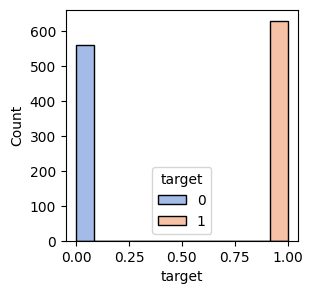

In [93]:
#histogram
plt.figure(figsize=(3, 3))
sns.histplot(data=df, x='target', hue='target', palette='muted')

On the other hand, we can plot the histogram for all of the other features and see their general distribution:

For example, age and max heart rate seem to have an approximate normal distribution whereas resting bp s, cholesterol and olpeak seem to have a right skewness 

Also in this graph we can find out how many of the abnormal values mentioned early can be found in each feature.

It is important to notice that there is some class imbalance in some features like in sex, where the male representation is almost three times women representation in the sample, which could lead to a bias in the result of the models that use this data.

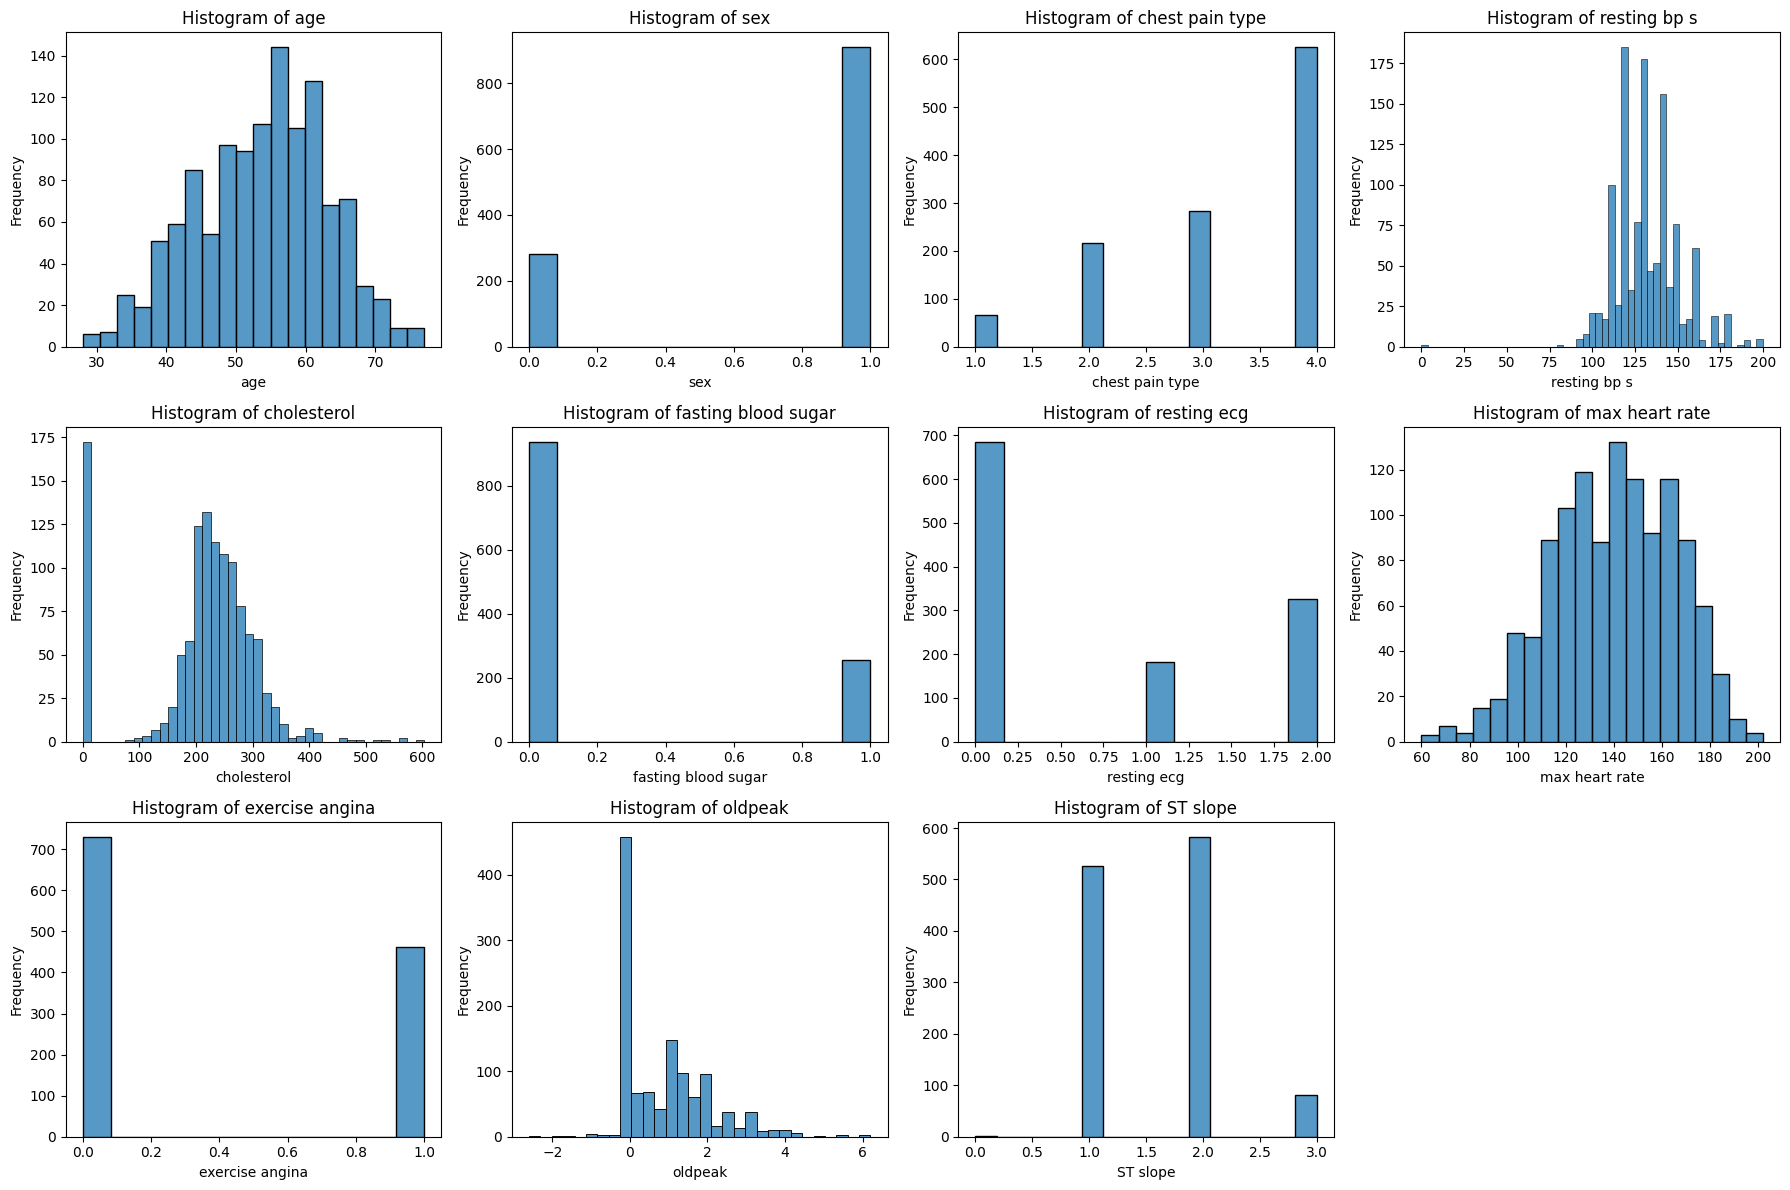

In [101]:
# List of feature names (excluding the target)
features = df.columns[:-1] 

# Plotting histograms
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[feature], palette='muted')
    plt.title(f'Histogram of {feature}')

    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Almost 175 samples have a value of cero for cholesterol and just a few of them in resting bp s

On the other hand, we can plot the histogram for all of the other features and see how is the target variable distributed across this other features.

From this we can note that:

* The age has almost a normal distribution for both classes of the target feature, with a small skewness to the left for the Heart disease patients and a small right skewness for the negative for heart disease patients, which can lead us to think that most of the patients from the sample that have a heart disease are between 50 and 65 five years old, while most of the patients without this disease are in a range of 40 to 55 years.

* The opposite happens on the max heart rate variable, being the people with a max heart rate between 120 to 140 a highest frequency for the value of positive for heart disease.

* Among the population, is more frequent to find women that don't have a heart disease than men.
* For the first three types of chest pain is more frequent to find a person without a heart disease and its totally the opposite in the fourth class, where most of the people have a heart disease.
* This notable frequency of the target feature in a class in particular can be found too in features like "exercise angina" and "slope"

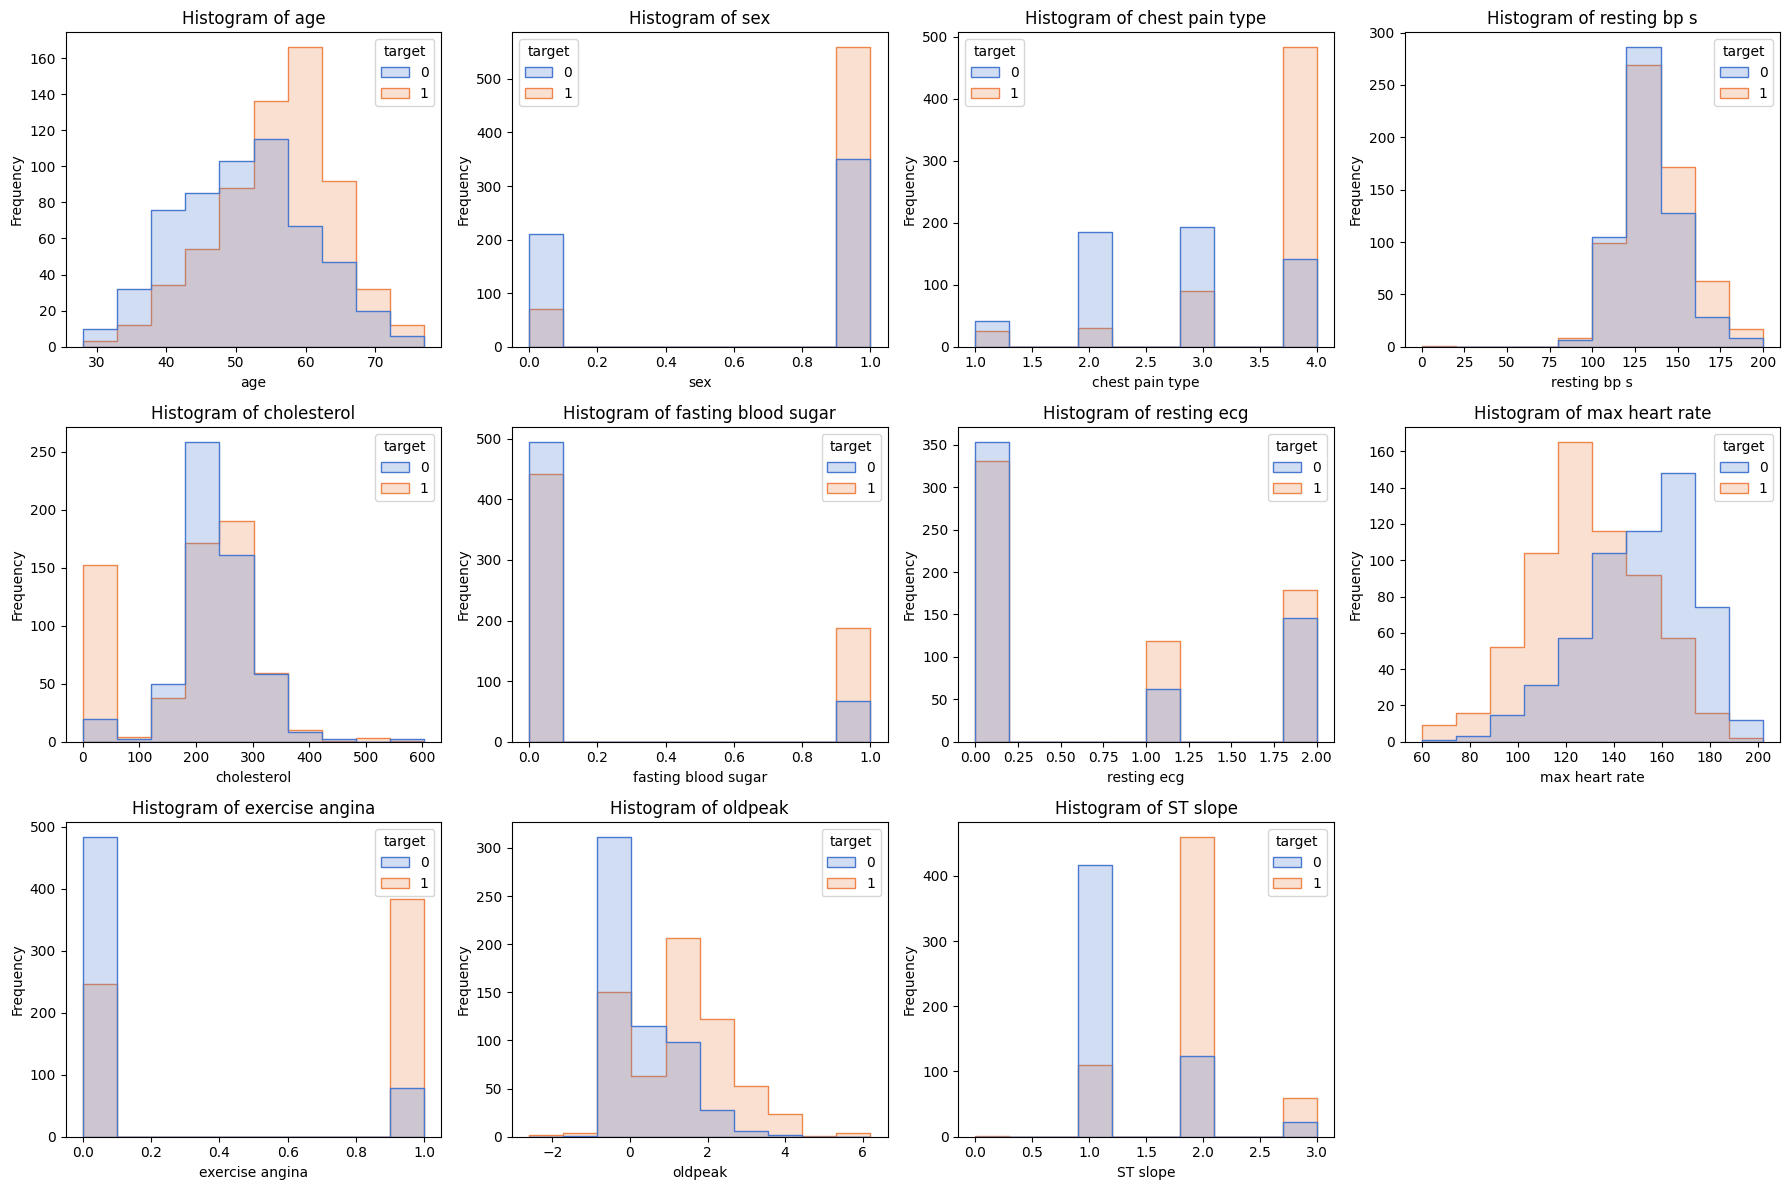

In [94]:
# List of feature names (excluding the target)
features = df.columns[:-1] 

# Plotting histograms
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df, x=feature, hue='target', palette='muted', element='step', kde=False, bins=10)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Outliers

We can visualize the outliers of the numerical variables by using boxplots. As most of the numerical variables have outliers, the model's performance could be compromised so we should handle this values.

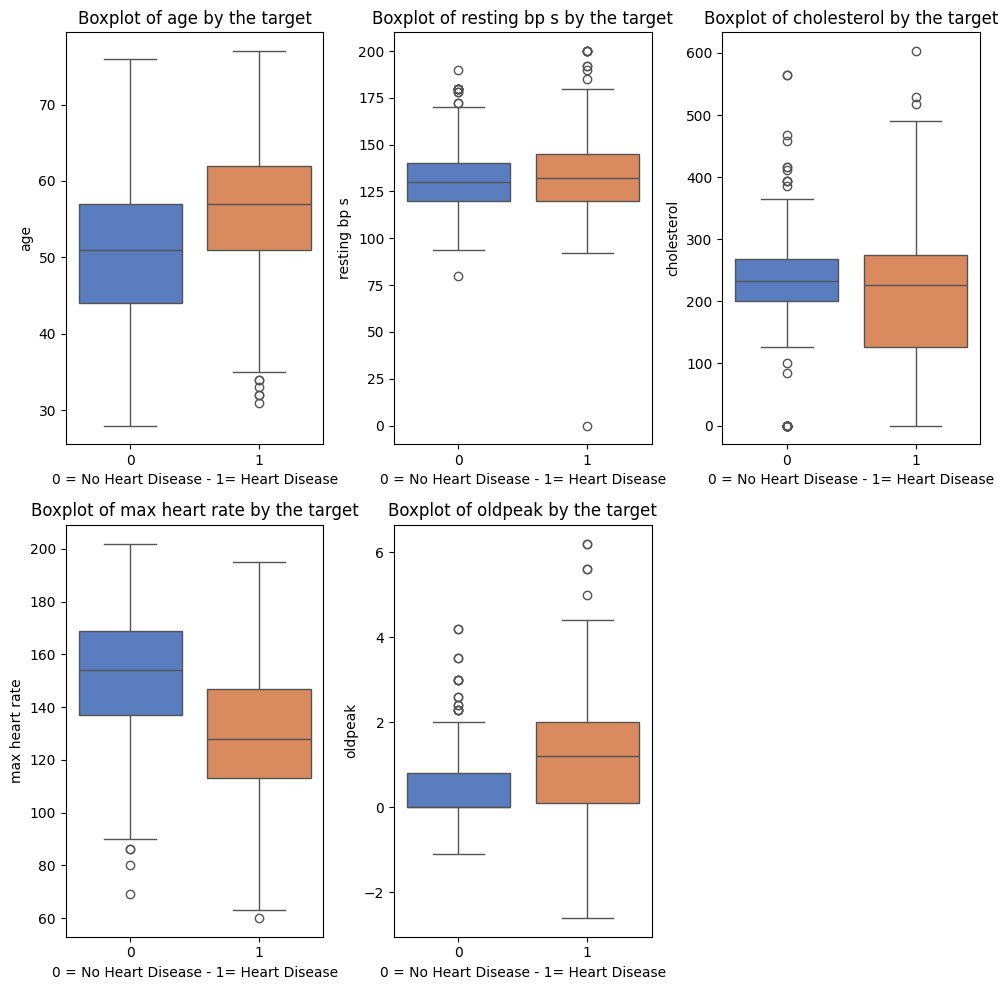

In [95]:
# box plot 

# Create a figure with subplots
numerical_features = numerical_df.drop(columns='target').columns
n_features = len(numerical_features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through each categorical feature and create a boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='muted')
    axes[i].set_title(f'Boxplot of {feature} by the target')
    axes[i].set_xlabel('0 = No Heart Disease - 1= Heart Disease')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation

We can also see the correlation between the target variable with the numerical features, which shows that oldpeak is the variable with the highest positive corelation while max hear rate is the one with the highest negative correlation.

This means that as the oldpeak value increases, the target variable also increases which suggests that higher levels of ST depression during exercise might be associated with a higher risk or severity of a heart disease.

On the other hand, with  max rate having the highest negative correlation, as the max heart rate increases, the target variable decreases. This might indicate that higher heart rate capacity is a protective factor or indicative of better cardiovascular health.

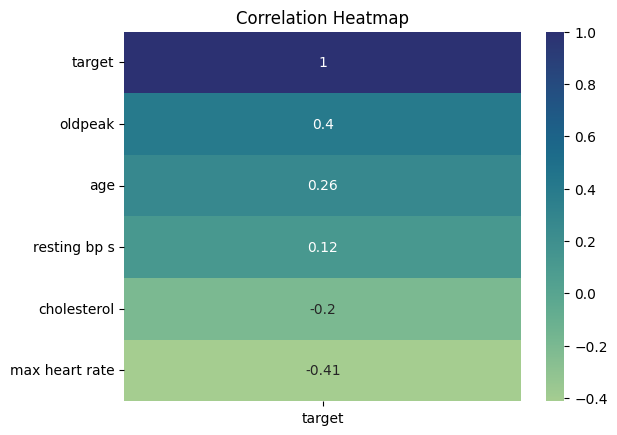

In [96]:
sns.heatmap(numerical_df.corr()[['target']].sort_values('target', ascending= False), cmap='crest', annot=True)
plt.title('Correlation Heatmap')
plt.show()

We can also search for relations between the variables with themselves as shown below: 

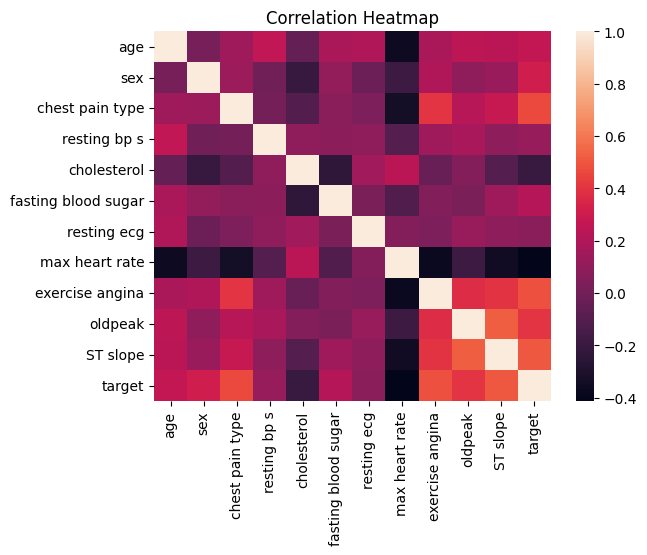

In [97]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

And we can search for trends and relations between the variables using a pairplot as well:

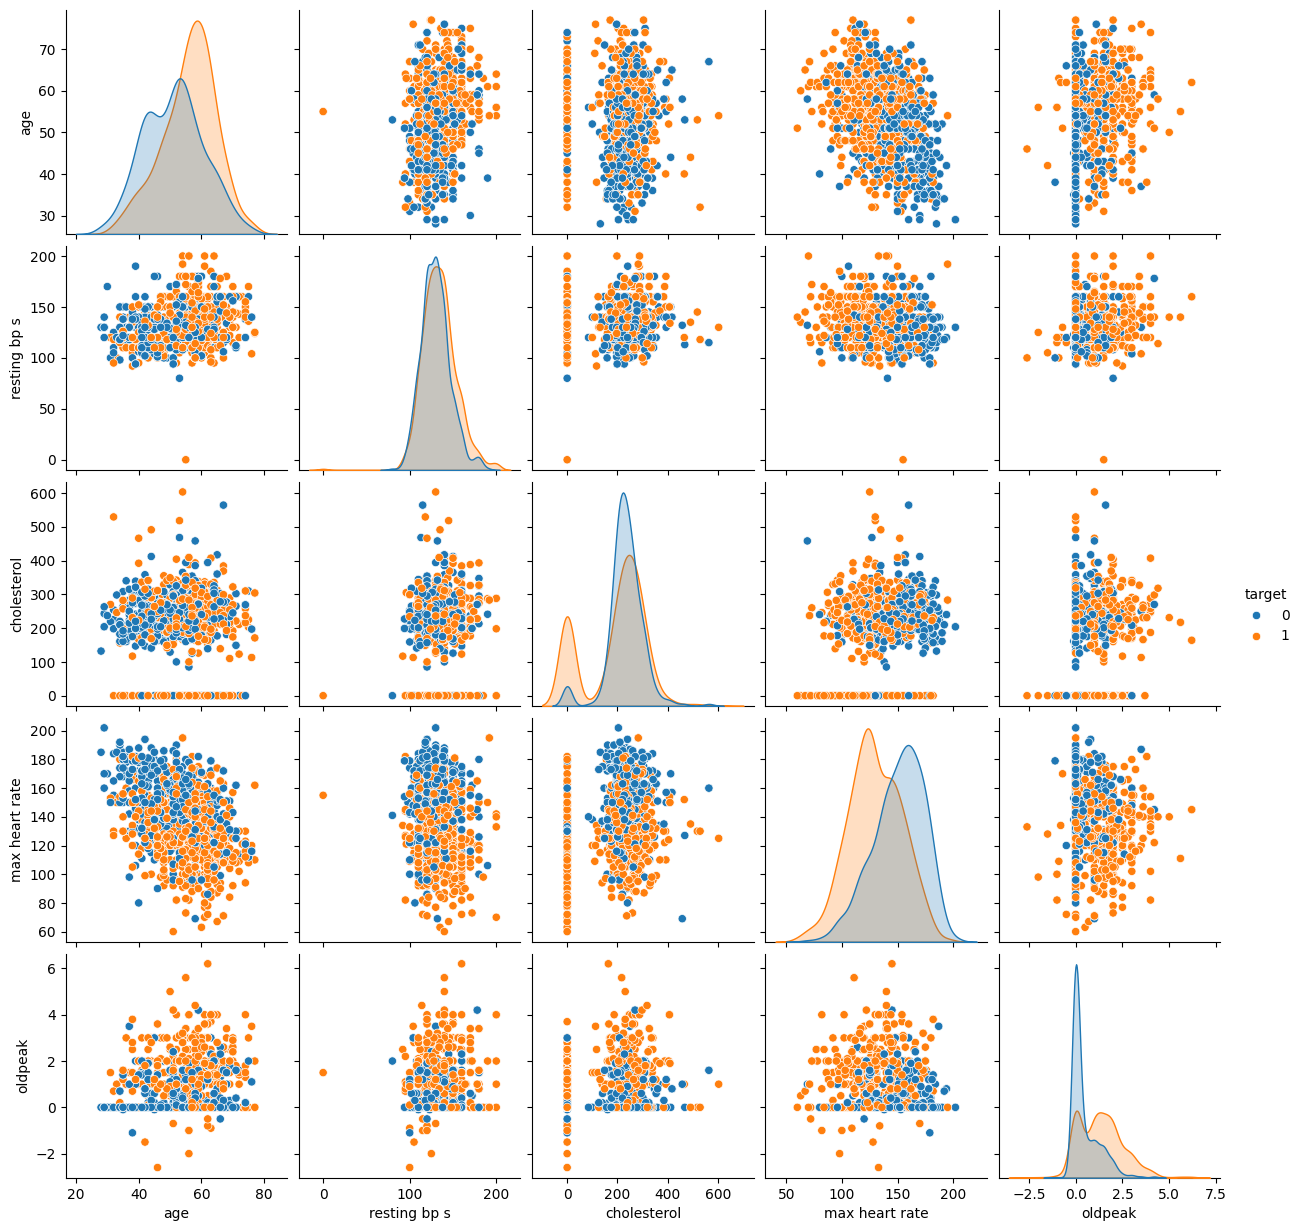

In [98]:
#scatterplot
sns.pairplot(numerical_df, size = 2.5, hue='target')
plt.show()

## Transformations

### 1. Change name format 
Eliminate spaces for the names is highly recommended as it improves compatibility with programming syntax and tools and ensures consistency across platforms and libraries that may not handle spaces well. Because of this we can replace the spaces with underscores as it follows:

In [102]:
# Rename columns by replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_')
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### 2. Handle abnormal values
As we determined before it is not possible for a person to have cero cholesterol or cero resting blood pressure, so we should handle this values.

In [111]:
cholesterol_Cero = df[df['cholesterol'] == 0].shape[0]
total_samples = df.shape[0]

rbps_Cero = df[df['resting_bp_s'] == 0].shape[0]
total_samples = df.shape[0]

print(f"Proportion of samples with cholesterol = 0: {round(cholesterol_Cero*100/total_samples, 2)} %")
print(f"Proportion of samples with cholesterol = 0: {round(rbps_Cero*100/total_samples, 2)} %")

Proportion of samples with cholesterol = 0: 14.45 %
Proportion of samples with cholesterol = 0: 0.08 %


As the number of samples for both features is not significative, we can drop this values:

In [112]:
df = df[df['cholesterol'] > 0]
df = df[df['resting_bp_s'] > 0]

### 3. Handle outliers
Outliers could affect the performance of future utilization of the data in predictive models, so should be handle properly. 

Some important considerations to know how to handle outliers in this dataset are:

* To determine if outliers are biologically plausible, so some domain knowledge is required. For example, extremely high or low values in some biochemical measurements might be rare but not impossible.

* It is necessary to verify if outliers are due to measurement errors or data entry issues. If so, correcting or removing them might be justified.

* Some models are sensitive to outliers, which can skew results so depending the models that are going to be used, this can be a high priority issue.

* If the outliers are valid and predictive of heart disease, removing them might lead to loss of valuable information, so some domain knowledge is necessary for this as well.

## Conclusions

* The characterization and prediction of coronary artery diseases are a major health concern as this kind of diseases have become one of the main cause of death in the last century, so the need for prediction models and diagnostic techniques has become imperative.
* The analysis of the data may suggest that  higher levels of ST depression during exercise might be associated with a higher risk or severity of a heart disease, while a higher heart rate capacity is a protective factor or indicative of better cardiovascular health

* Due to the discrete nature of the target feature, this dataset likely to be use for further analysis in a classification task